In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cartopy.feature as cfeature
# plot
import cmocean as ccm

In [2]:
from dask.distributed import Client
c = Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 20.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34487,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 20.00 GiB
Comm: tcp://127.0.0.1:43769,Total threads: 2
Dashboard: http://127.0.0.1:40213/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:34047,


# Loading data

In [3]:
%%time
chunk_size = {"x":500,"y":500}

diridat = '/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.'
daUGAI = xr.open_mfdataset(diridat+'GAI-S/1y/????/eORCA025.L75-IMHOTEP.GAI_y*.1y_gridU.nc', chunks=chunk_size, parallel=True) #, decode_times=False).assign_coords(time_counter=time)
daUAI = xr.open_mfdataset(diridat+'AI-S/1y/????/eORCA025.L75-IMHOTEP.AI_y*.1y_gridU.nc', chunks=chunk_size, parallel=True) #, decode_times=False).assign_coords(time_counter=time)
daUS = xr.open_mfdataset(diridat+'S-S/1y/????/eORCA025.L75-IMHOTEP.S_y*.1y_gridU.nc', chunks=chunk_size, parallel=True) #, decode_times=False).assign_coords(time_counter=time)

tauxGAI = daUGAI.sozotaux#.where(nav_lat>=60, drop=True)
tauxAI = daUAI.sozotaux#.where(nav_lat>=60, drop=True)
tauxS = daUS.sozotaux#.where(nav_lat>=60, drop=True)

daVGAI = xr.open_mfdataset(diridat+'GAI-S/1y/????/eORCA025.L75-IMHOTEP.GAI_y*.1y_gridV.nc', chunks=chunk_size, parallel=True) #, decode_times=False).assign_coords(time_counter=time)
daVAI = xr.open_mfdataset(diridat+'AI-S/1y/????/eORCA025.L75-IMHOTEP.AI_y*.1y_gridV.nc', chunks=chunk_size, parallel=True) #, decode_times=False).assign_coords(time_counter=time)
daVS = xr.open_mfdataset(diridat+'S-S/1y/????/eORCA025.L75-IMHOTEP.S_y*.1y_gridV.nc', chunks=chunk_size, parallel=True) #, decode_times=False).assign_coords(time_counter=time)

tauyGAI = daVGAI.sometauy#.where(nav_lat>=60, drop=True)
tauyAI = daVAI.sometauy#.where(nav_lat>=60, drop=True)
tauyS = daVS.sometauy# .where(nav_lat>=60, drop=True)

CPU times: user 2.21 s, sys: 255 ms, total: 2.46 s
Wall time: 8.9 s


In [67]:
# print(daUGAI.vozocrtx[0,0,500,:].values)
# daUGAI.vozocrtx
# daUGAI.vozocrtx[0,0,500,:].plot()
tauxGAI

<xarray.DataArray 'sozotaux' (time_counter: 39, y: 1207, x: 1442)>
dask.array<concatenate, shape=(39, 1207, 1442), dtype=float32, chunksize=(1, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x
Attributes:
    units:             N/m2
    valid_min:         0.0
    valid_max:         0.0
    long_name:         Wind Stress along i-axis
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

In [5]:
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
mesh_hgr = xr.open_dataset(diri+'mesh_hgr.nc',chunks=chunk_size).squeeze()
e1t = mesh_hgr.e1t.fillna(0)
e2t = mesh_hgr.e2t.fillna(0)
nav_lon =  mesh_hgr.nav_lon
nav_lat =  mesh_hgr.nav_lat

In [6]:
curlGAI = (tauyGAI.diff(dim='x') / e1t.isel(x=np.arange(1,1442)) ).isel(y=np.arange(1,1207)) - \
((tauxGAI.diff(dim='y')/ e2t.isel(y=np.arange(1,1207)) ).isel(x=np.arange(1,1442)) )

curlAI = (tauyAI.diff(dim='x') / e1t.isel(x=np.arange(1,1442)) ).isel(y=np.arange(1,1207)) - \
((tauxAI.diff(dim='y')/ e2t.isel(y=np.arange(1,1207)) ).isel(x=np.arange(1,1442)) )

curlS = (tauyS.diff(dim='x') / e1t.isel(x=np.arange(1,1442)) ).isel(y=np.arange(1,1207)) - \
((tauxS.diff(dim='y')/ e2t.isel(y=np.arange(1,1207)) ).isel(x=np.arange(1,1442)) )

In [56]:
# e1t.isel(x=np.arange(1,1442),y=np.arange(1,1207)) 
# e1t.isel(x=np.arange(0,1442),y=np.arange(0,1207)) 
print(tauyAI[0,500,-5:].values)
# tauyAI[0,500,:5].diff(dim='x')

# e2t[:,500].values

[-0.01168724 -0.01202495 -0.01218381 -0.01195409 -0.01171431]


In [46]:
(tauyAI[0,500,1] - tauyAI[0,500,0]).values

array(0.00023978, dtype=float32)

In [7]:
curlGAI

<xarray.DataArray (time_counter: 39, y: 1206, x: 1441)>
dask.array<sub, shape=(39, 1206, 1441), dtype=float64, chunksize=(1, 499, 499), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x

# wind curl mean 1980-2004 and 2005 -2018

In [17]:
# full time period
# y1= "1980"
# y2= "2018"

# y1= "2005"
# y2= "2018"

y1= "1980"
y2= "2004"

In [18]:
curlGAImean = curlGAI.sel(time_counter=slice(y1,y2)).mean('time_counter')

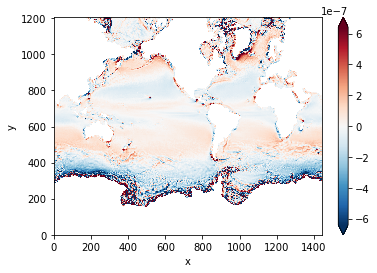

In [19]:
curlGAImean.plot(robust=True)

In [20]:
curlGAImean

<xarray.DataArray (y: 1206, x: 1441)>
dask.array<mean_agg-aggregate, shape=(1206, 1441), dtype=float64, chunksize=(499, 499), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

#### plotting the map

In [21]:
mbathy = xr.open_dataset(diri+'eORCA025.L75_domain_cfg_closed_seas_greenland.nc')['bathy_meter'].fillna(0) # grille lat/lon

# default gridlines parameters
gridl=False
incrgridlon=30
incrgridlat=10

# vue N.Atl
# loncentr=330 # before it was zero
# latcentr=70
#vue polaire
loncentr=200 # before it was zero
latcentr=90

sath=2085831

In [22]:
#========= Plot settings ===============
# colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [23]:
cmap = cm.RdYlBu_r
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

lmin = -2e-7
incr = 5e-8
lmax = lmin*(-1)+incr
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [24]:
bounds

array([-2.0e-07, -1.5e-07, -1.0e-07, -5.0e-08,  0.0e+00,  5.0e-08,
        1.0e-07,  1.5e-07,  2.0e-07])

wind_stress_curl_1980-2004.png


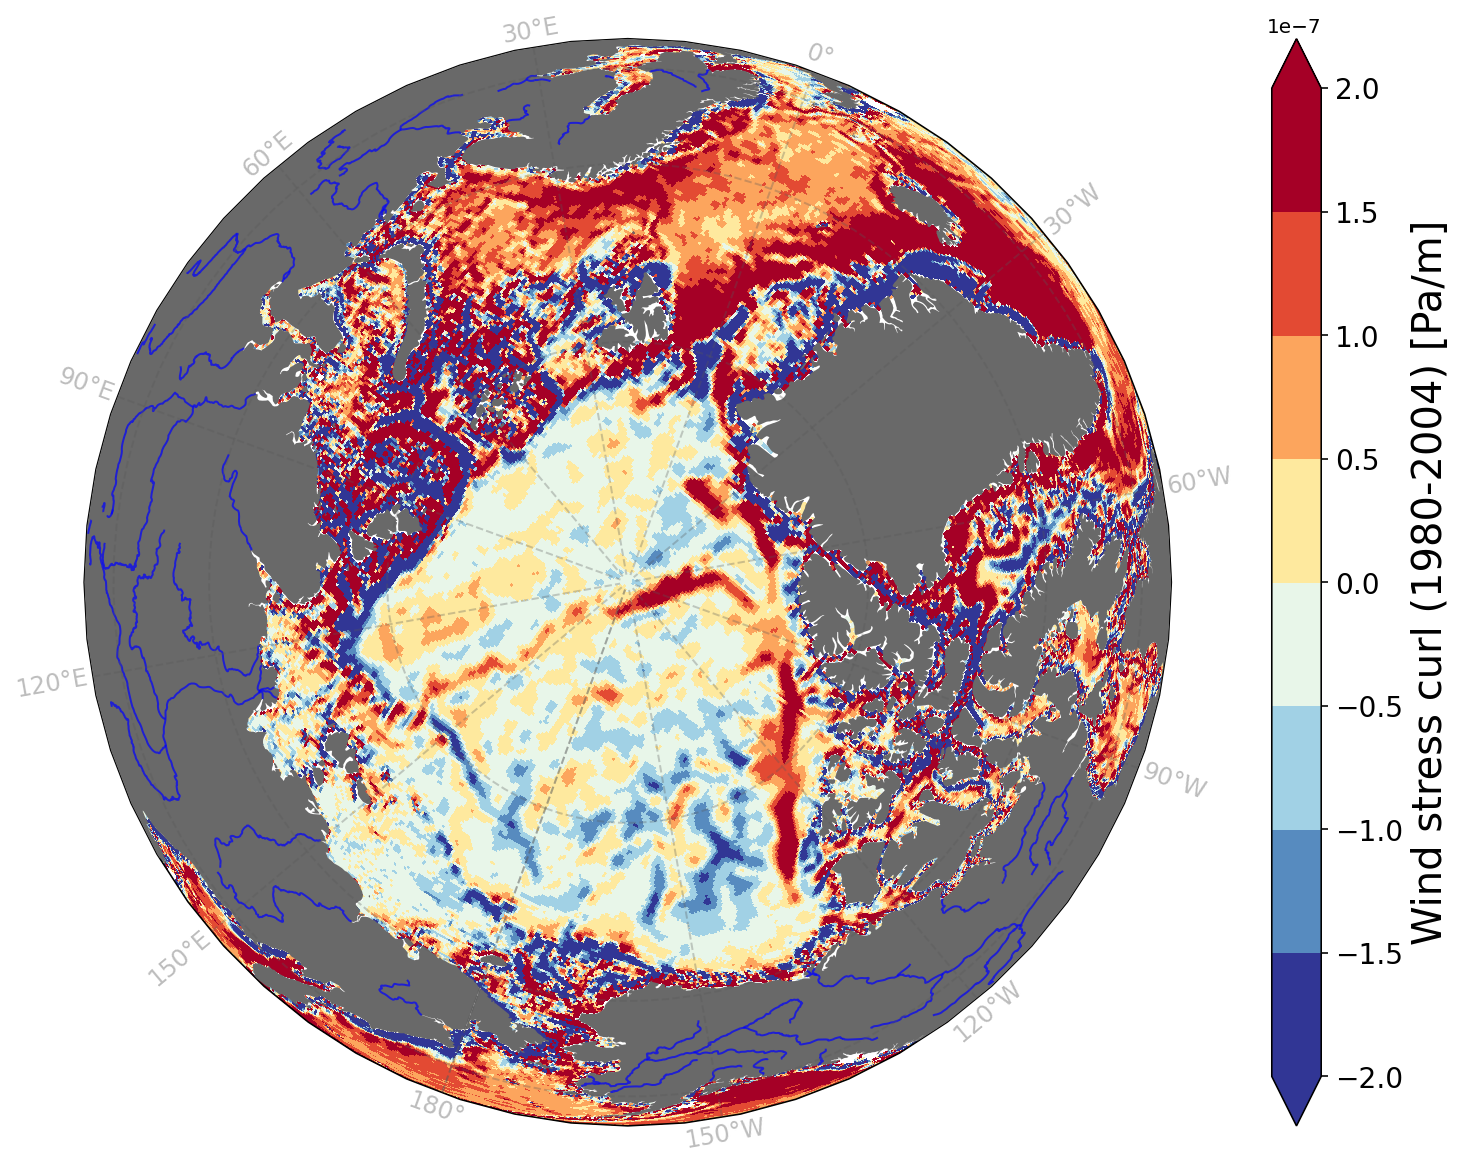

In [25]:

diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"

# tlabel=" SSH trend of GREENLAND (mm/yr) over "+y1+"-"+y2
# namo  ="SSH_trendGAIAI_"+y1+"-"+y2+".png"
namo  ="wind_stress_curl_"+y1+"-"+y2+".png"

print(namo)
#===========================================
fig = plt.figure(figsize=([18,10]),facecolor='none', dpi=72*2)

trdata  = ccrs.PlateCarree() # Data system proj (if coords are in lat lon, use PlateCarre here)
ax = plt.axes(projection= ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath))

#========= PLOT DATA
cs  = plt.pcolormesh(nav_lon, nav_lat, curlGAImean,shading='flat',cmap = mycm,transform=trdata, norm=norm)
cbar = fig.colorbar(cs,extend='both', ticks=bounds)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r"Wind stress curl ("+y1+"-"+y2+") [Pa/m]", fontsize=20)

# cs2  = plt.pcolormesh(nav_lon, nav_lat, m2plt, shading='flat',transform=trdata) 
#========= coastlines and gridlines
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
clr2 = ax.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2 = ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style; gl.ylabel_style = label_style


# #============= BATHYMETRY
# bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
# color_levels= ['k','navy','mediumblue','slateblue']
# # west
# Ct1 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
# # east
# Ct2 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

# plt.title(tlabel,fontsize=24)
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
plt.close(fig)
# plt.clf()